# Importing the dataset

In [1]:
import pandas as pd
star_wars = pd.read_csv("StarWars.csv",encoding = "ISO-8859-1")
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [2]:
mapping = {
    "Yes" : True,
    "No"  : False
}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapping)


In [3]:
import numpy as np
mapping = {
   "Star Wars: Episode I  The Phantom Menace": True,
   "Star Wars: Episode II  Attack of the Clones" : True,
   "Star Wars: Episode III  Revenge of the Sith" : True,
   "Star Wars: Episode IV  A New Hope" : True,
   "Star Wars: Episode V The Empire Strikes Back" : True,
   "Star Wars: Episode VI Return of the Jedi" : True,
   np.nan : False
}
cols = star_wars.columns[3:9]
print(cols)
for col in cols:
  star_wars[col] = star_wars[col].map(mapping)

for col, i in zip(cols,range(1,7)):
  star_wars = star_wars.rename(columns = {str(col) : "seen_" + str(i)})

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [4]:
cols = star_wars.columns[9:15]
for col, i in zip(cols,range(1,7)):
    star_wars = star_wars.rename(columns={str(col) : "ranking_ " + str(i)})
star_wars.iloc[1:, 9:15] = star_wars.iloc[1:,9:15].astype(float)

In [5]:
mean= star_wars.iloc[1:,9:15].mean()
print(mean)

ranking_ 1    3.732934
ranking_ 2    4.087321
ranking_ 3    4.341317
ranking_ 4    3.272727
ranking_ 5    2.513158
ranking_ 6    3.047847
dtype: float64


[]

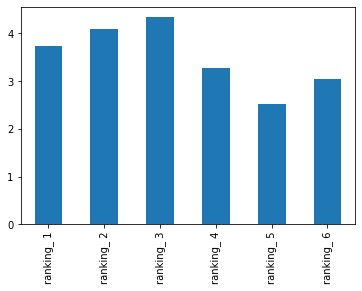

In [6]:
import matplotlib.pyplot as plt
mean.plot.bar()
plt.plot()

# Rankings
As we can see in the plot, we see that the 5th star wars movie has the highest overall ranking, probably due to the famous Vader reveal scene. Movie 3 seems to be the ranked the lowest of all the movies, maybe due to the dark atmosphere or just how Anakin turns into Vader

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


<BarContainer object of 6 artists>

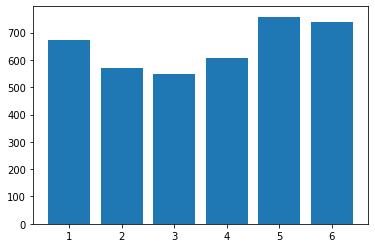

In [7]:
sums = star_wars.iloc[1:, 3:9].sum()
print(sums)
plt.bar([1,2,3,4,5,6],sums)


# Viewings
In this particular survey, we can see that the sequels(4-6) have been seen more than the prequels (1-3). 5 has the highest viewership, and 3 has the lowest viewership, which does line up with the rankings we saw earlier.

In [8]:
star_trek_yes = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
star_trek_no = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

ranking_ 1    3.968675
ranking_ 2    4.255422
ranking_ 3    4.403382
ranking_ 4    3.110843
ranking_ 5    2.407229
ranking_ 6    2.850602
dtype: float64


[]

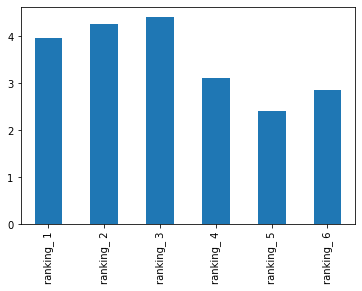

In [9]:

mean= star_trek_yes.iloc[1:,9:15].mean()
print(mean)
mean.plot.bar()
plt.plot()

seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64


[]

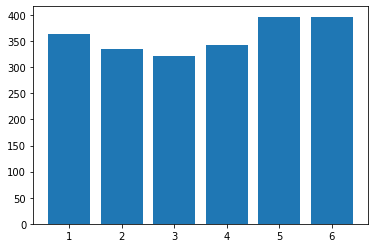

In [10]:
sums = star_trek_yes.iloc[1:, 3:9].sum()
print(sums)
plt.bar([1,2,3,4,5,6],sums)
plt.plot()


ranking_ 1    3.489051
ranking_ 2    3.919903
ranking_ 3    4.286408
ranking_ 4    3.432039
ranking_ 5    2.628641
ranking_ 6    3.237864
dtype: float64


[]

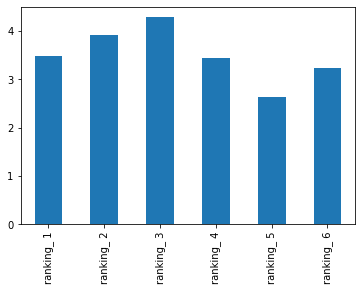

In [11]:

mean= star_trek_no.iloc[1:,9:15].mean()
print(mean)
mean.plot.bar()
plt.plot()

seen_1    300
seen_2    227
seen_3    220
seen_4    257
seen_5    352
seen_6    333
dtype: int64


[]

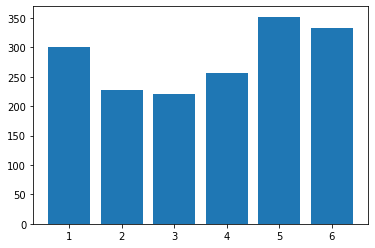

In [12]:

sums = star_trek_no.iloc[1:, 3:9].sum()
print(sums)
plt.bar([1,2,3,4,5,6],sums)
plt.plot()

# Star Trek Differences
As we can see, those that are a fan of star trek are more slightly more extreme on their takes that the sequels are better than the prequels, with there being a bigger  gap between movie 5 and movie 3. Non-fans follow the same trend, however their ranking of 3 and 5 are closer than that of the fans of star trek.